


## Exempel 2: Karaktärisering av bindningar mellan atomer för med hjälp av infrarött ljus.
### Bakgrund
Material och molekyler kan under vissa förutsättningar approximeras med sina punkt-massor bestående av atomernas massa, samanbundna med fjädrar vilkas fjäderkonstant beror på styrkan på den kemiska bindningen mellan atomerna. I vissa konfigurationer är laddningsfördelningen på atomerna inte helt jämn. Men kan då driva den harmoniska oscillatorn genom infrarött ljus.


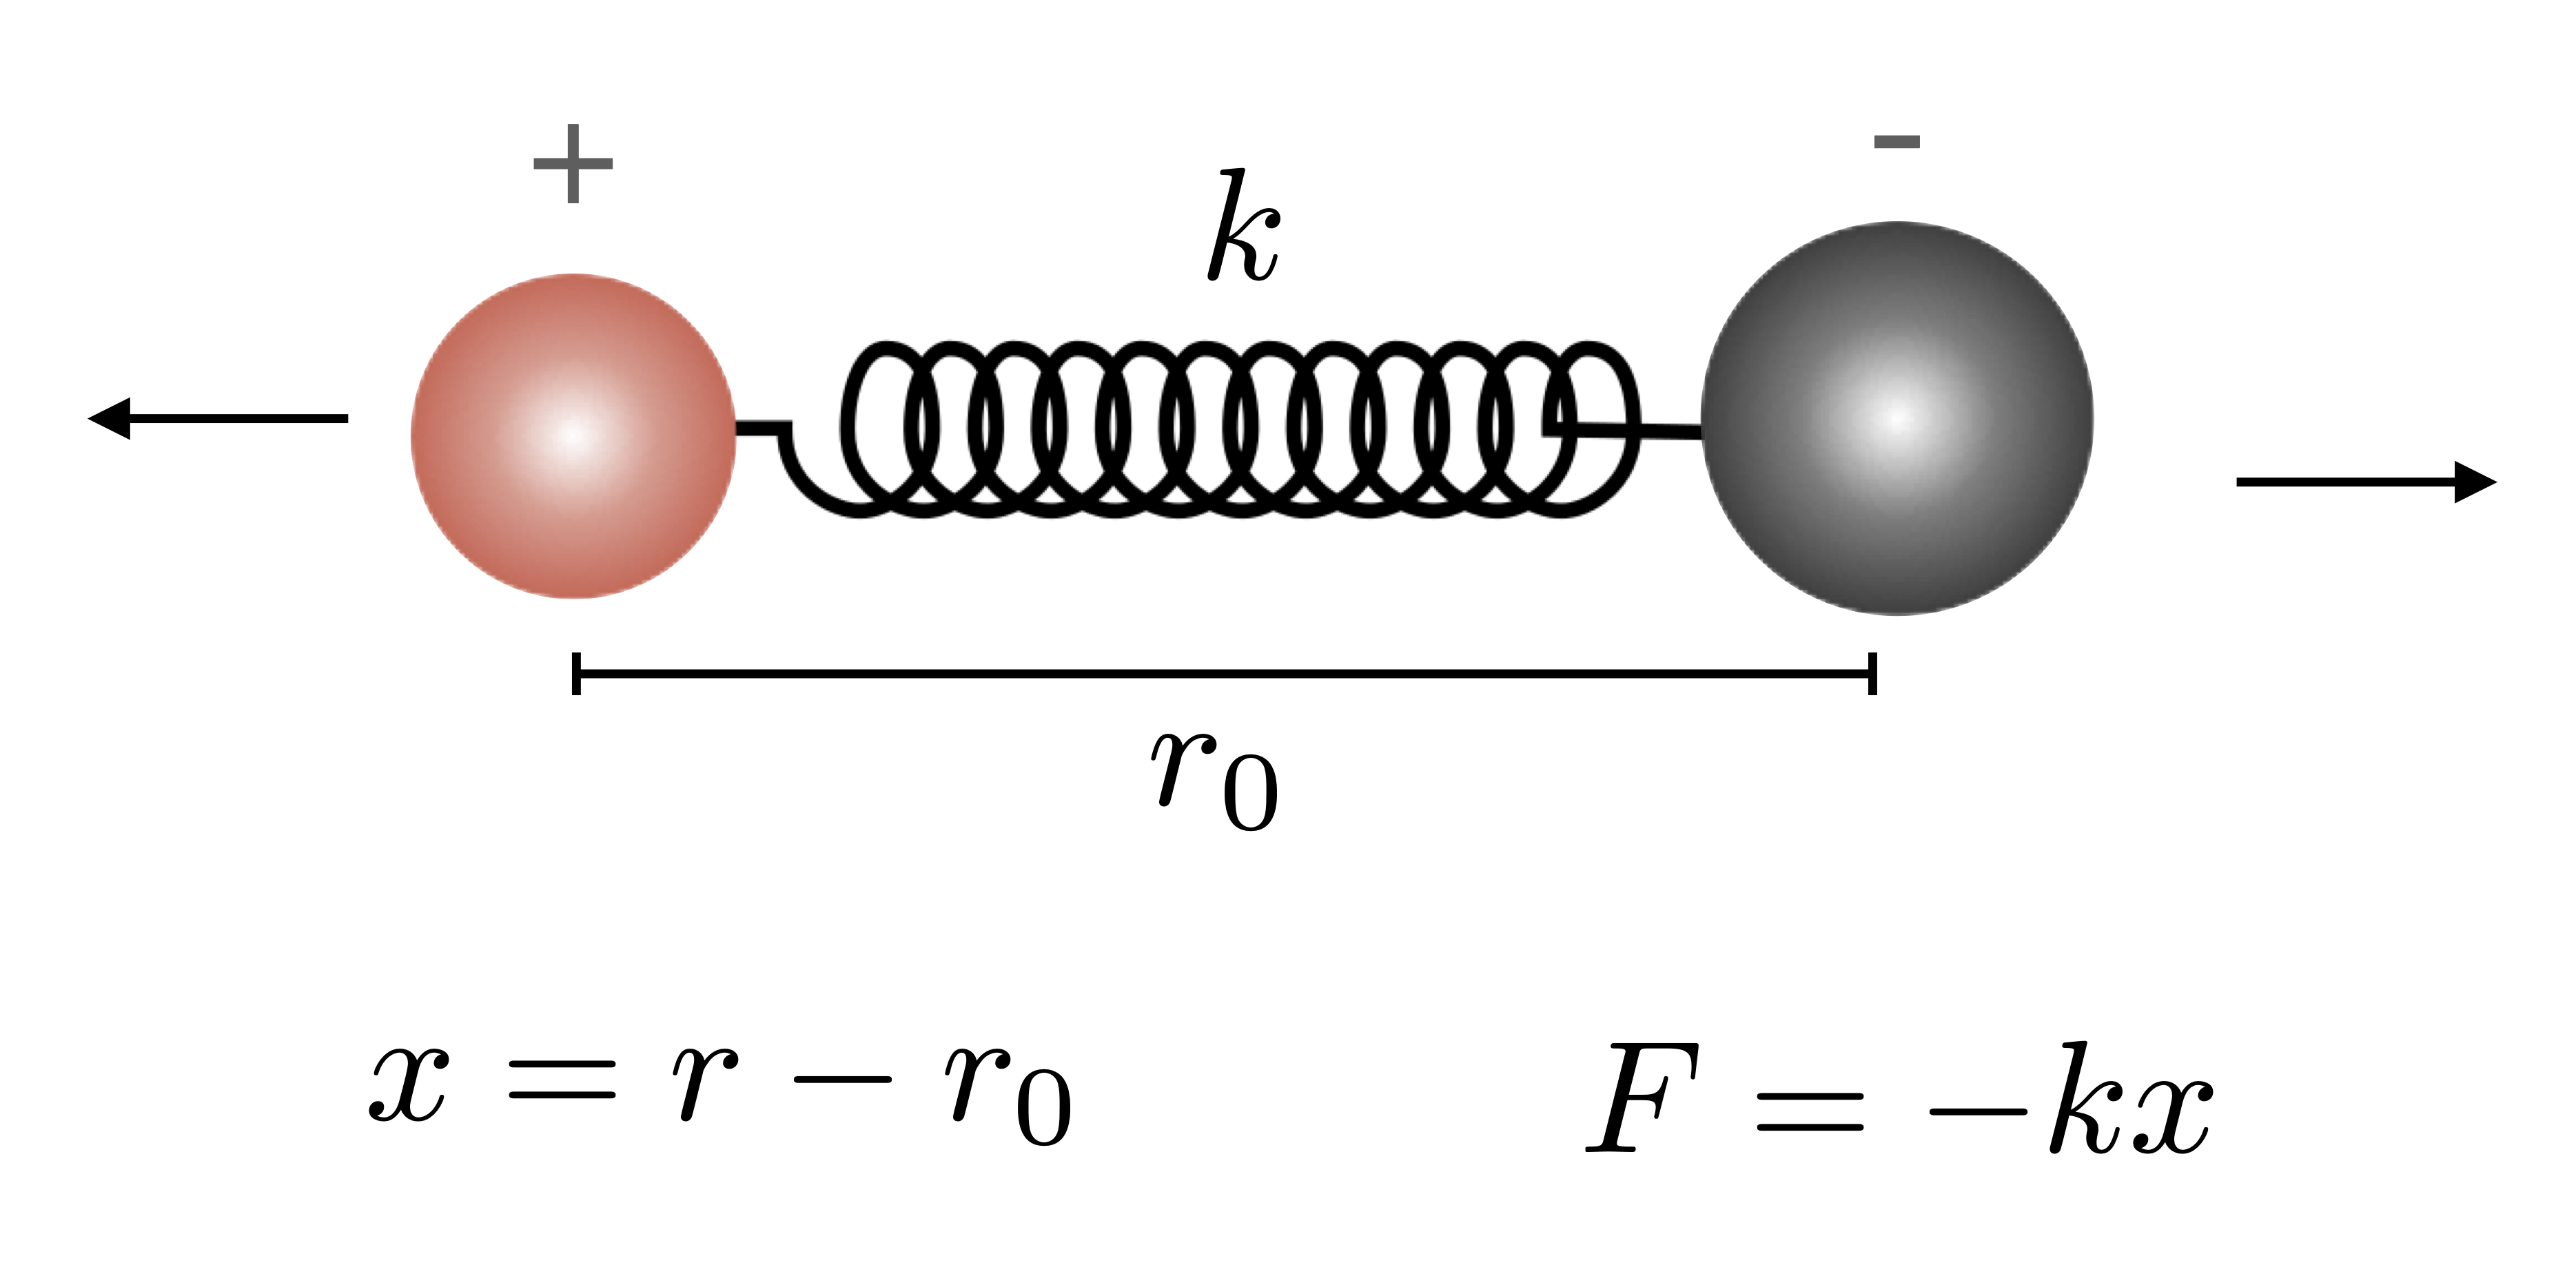

In [2]:
# Nu arbetar vi i en ny notebook, så vi måste ladda biblioteken igen.
from IPython.display import Image
from IPython.display import display, Math, Latex
import numpy as np  # Numeriska rutiner
from numpy import pi  # ~3.14 (för att slippa skriva np.pi)
import matplotlib.pyplot as plt  # enkla grafer
Image(filename='Bild3.png', width = 400, height = 200)

Ett sätt att karaktärisera vilka bindningar som finns i ett material eller molekyl är att undersöka hur mycket de atomära bindingnarna absorberar det elektromagnetiska fältet. På samma sätt som den elektriska dipolen för hela proteinet svänger i det elektriska fältet, så kommer bindningar mellan atomer att påverkas av ett elektromagnetiskt fält. En metod som utnytjar det är IR-spektroskopi, där infrarött ljus används för att driva den (nästan) harmoniska oscillatorn som bindningarna ger upphov till. Systemet bildar alltså en driven, eller tvingad, harmonisk oscillator. Naturligtvis förekommer också en dämpning till följd av kollisioner med andra atomer i gaser eller solida material.

Den drivna och dämpade harmoniska oscillatorn beskrivs av ekvationen

$$
\begin{equation}
\frac{d^{2} x}{dt^{2}} + 2\gamma\frac{d x}{dt} + \omega_{0}^{2} x = A_{d}\text{cos}(\omega_{d}t) .
\end{equation}
$$
precis som i fallet med torsionsoscillatorn i föregående exempel, så har man ett initialtillstånd som definieras av position och hastighet. Här kan nämnas att när man studerar mycket små system spelar kvantmekaniska effekter ibland in. I den klassiska mekaniken lär vi oss att för ett initialtillstånd där $x_{0}=v_{0}=0$ har vi ett förlopp utan oscillationer. I en molekyl eller solid vibrerar alltid atomerna, även vid 0K, detta kvantmekaniska fenomen som kallas nollpunktsvibrationer. När vi studerar svingade svängningar som i IR-spektroskopi kan vi bortse från detta fenomen, och atomerna beskrivs som klassiska punktmassor.

Oavsett vad man har för initialtillstånd, kommer en driven harmonisk oscillator efter ett tag att svänga med den tvungna frekvensen, vi kallar det för den *stadigvarande* lösningen. Det första förloppet, där svängningen är starkt påverkad av oscillatorns egenfrekvens och initialtillstånd, kallas för *transient*. Nedan följer en kod-snutt som simulerar en driven och dämpad harmonisk oscillator för givna initialtillstånd.

**1) Studera den tvungna sväningingen**

**a) För $A_{d}=0.2$, vad händer med amplituden för svängningen när $\omega_{d}$ närmar sej $\omega_{0}$?**

**b) Hur påverkas insvängningsförloppet av dämpning och initialvillkor?**

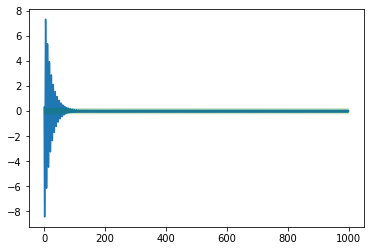

In [3]:
from oscillator_lib import solve_linear_harmonic_oscillator

time = np.linspace(0, 1000, 100000)


# Initialvillkor
x0 = 0.31
v0 = -9.2

w0 = 1

# Dämpningsfaktorn
gamma = 0.05

Ad = 0.2
wd = 2.0

# Om du vill plotta utslaget på drivfunktionen läggs den här i variabeln D
D=Ad*np.cos(wd*time)

# Vi löser den linjära harmoniska oscillatorn för valda värden, vi får ut position i p1 och hastighet i v1.
[p1, v1] = solve_linear_harmonic_oscillator(time, x0, v0, w0, damping = gamma, drive_ampl = Ad, drive_ang_freq = wd)
plt.plot(time,p1,0)
plt.plot(time,D,color='green', alpha=0.2)
# Behöver du begränsa axlarna för att läsa av grafen, använd 'xlim' och 'ylim' enligt nedan.
# plt.xlim(0,200)
# plt.ylim(-0.25,0.25)



Fundera över hur hela förloppet skulle kunna anpassas till en kurva, uppenbarligen har vi ju flera olika perioder representerade för vissa förhållanden mellan $\omega_{0}$ och $\omega_{d}$ (tydligt för t.ex. $\omega_{0}=1$, $\omega_{d}=2$, $A_{d}=0.2$, $\gamma=0.05$ och lämpliga initialtillstånd). **Den princip som kan användas för att studera överlagrade periodiska förlopp kallas superpositionsprincipen**, något ni kommer studera i senare kurser.

Då oscillatorn absorberar maximalt med energi från den pålagda svängningen kan man genom att mäta absorptionen av IR-ljus bestämma vilka resonansfrekvenser som finns i en molekyl, och därigenom bestämma vilka bindingar som förekommer. Implementera själv hur du med hjälp av funktionen *fit_steady_state(t,x)* testar vad som händer med amplituden för oscillatorn när den tvingade svängningen är i resonans. 

Använd sedan funktionen *measure_IR* for att mäta egenskaperna hos oscillatorerna som definierar bindningarna 1, 2, 3 och 4.

**2) Karaktärisera oscillatorerna**

**a) Vilken resonansfrekvens har bindningarna?**

**b) Vilken bindning är mest dämpad?**

**c) Hur påverkar dämpningen fas-skiftet?**

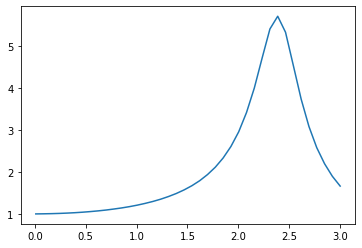

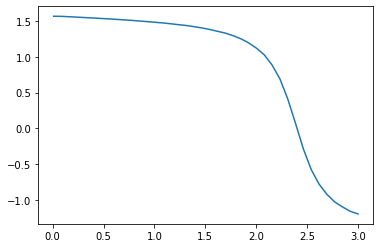

In [4]:
from oscillator_lib import solve_linear_harmonic_oscillator
from oscillator_lib import measure_IR
from oscillator_lib import fit_steady_state


time = np.linspace(0, 100, 10000)

# Sätt en driv-amplitud
Ad=2.0

# Vi gör en tom lista där vi lagrar ampliduten och fasen för det stadigvarande förloppet
Steady_state_amplitudes=[]
Phase_shifts=[]

# Gör en lista på drivfrekvenser att testa, t.ex. mellan 0.01 och 3.0 med hjälp av np.linspace:
wd_tests=[0.0] 

for wd in wd_tests:
# Precis som i fallet för torsionsoscillatorn i förra exemplet, är initialvärden för $x$ och $v$ inte kända.
# measure_IR tar 4 parametrar, 1) vald bindning, 2) tidsaxel, 3) Drivamplitud, 4) drivfrekvens, svaret landar i x
    x= measure_IR(4, time, Ad, wd)
# Nu kan vi använda funktionen fit_steady_state(time,x) för att ta reda på t.ex. amplituden, den returneras i variabeln A
    fit, [A, w, ph] = fit_steady_state(time,x,wd=wd)
# Nu kan vi lägga amplituder och fas i sina respektive listor.
    Steady_state_amplitudes.append(A)
    Phase_shifts.append(ph)



plt.plot(wd_tests, np.divide(Steady_state_amplitudes,Ad))

plt.show()


plt.plot(wd_tests, Phase_shifts)

plt.show()
